In [1]:
!pip install git+https://github.com/AAMIASoftwares-research/HCATNetwork.git@google-colab
!pip install git+https://github.com/AAMIASoftwares-research/DatasetUtilities.git@google-colab


  Cloning https://github.com/AAMIASoftwares-research/HCATNetwork.git (to revision google-colab) to c:\users\zaira\appdata\local\temp\pip-req-build-a7l1j7vx
  Resolved https://github.com/AAMIASoftwares-research/HCATNetwork.git to commit e94413cce5e4fad1a00a771112bf7e66e3501d4d
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/AAMIASoftwares-research/HCATNetwork.git 'C:\Users\zaira\AppData\Local\Temp\pip-req-build-a7l1j7vx'
  Running command git checkout -b google-colab --track origin/google-colab
  branch 'google-colab' set up to track 'origin/google-colab'.
  Switched to a new branch 'google-colab'


  Cloning https://github.com/AAMIASoftwares-research/DatasetUtilities.git (to revision google-colab) to c:\users\zaira\appdata\local\temp\pip-req-build-gk9oy3e8
  Resolved https://github.com/AAMIASoftwares-research/DatasetUtilities.git to commit abbffcb17dc017057ea1db6c361aecba70cf76f5
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Cloning https://github.com/AAMIASoftwares-research/HCATNetwork.git (to revision google-colab) to c:\users\zaira\appdata\local\temp\pip-install-nkwszret\hcatnetwork_b854ba29498749caa6689c3e1681d29d
  Resolved https://github.com/AAMIASoftwares-research/HCATNetwork.git to commi

  Running command git clone --filter=blob:none --quiet https://github.com/AAMIASoftwares-research/DatasetUtilities.git 'C:\Users\zaira\AppData\Local\Temp\pip-req-build-gk9oy3e8'
  Running command git checkout -b google-colab --track origin/google-colab
  branch 'google-colab' set up to track 'origin/google-colab'.
  Switched to a new branch 'google-colab'
  Running command git clone --filter=blob:none --quiet https://github.com/AAMIASoftwares-research/HCATNetwork.git 'C:\Users\zaira\AppData\Local\Temp\pip-install-nkwszret\hcatnetwork_b854ba29498749caa6689c3e1681d29d'
  Running command git checkout -b google-colab --track origin/google-colab
  branch 'google-colab' set up to track 'origin/google-colab'.
  Switched to a new branch 'google-colab'


In [2]:
import hcatnetwork
import HearticDatasetManager

In [48]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch
%matplotlib inline
# from google.colab import drive
# drive.mount('/content/drive')

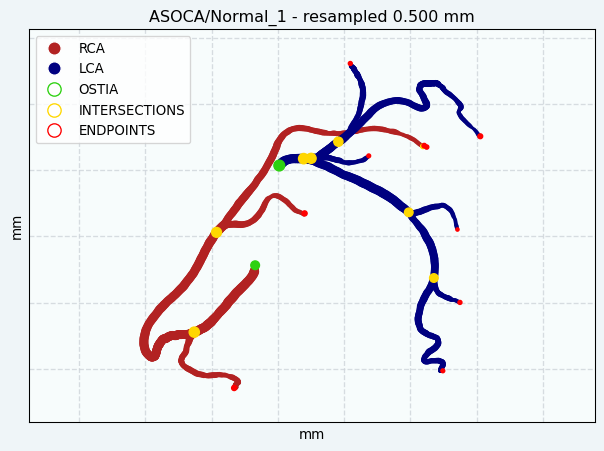

In [59]:
# Get file names
cat08_dataset_folder = "C:/Users/zaira/Documents/uni/HIGH_PERFORMANCE_COMPUTING/Neuroengineering/project/heart_data/CAT08"
from HearticDatasetManager.cat08.dataset import DATASET_CAT08_GRAPHS
cat08_graph_file = os.path.join(
    cat08_dataset_folder,
    DATASET_CAT08_GRAPHS[0]
)

asoca_dataset_folder = "C:/Users/zaira/Documents/uni/HIGH_PERFORMANCE_COMPUTING/Neuroengineering/project/heart_data/ASOCA"
from HearticDatasetManager.asoca.dataset import DATASET_ASOCA_GRAPHS_RESAMPLED_05MM_DICT
asoca_graph_file = os.path.join(
    asoca_dataset_folder,
    DATASET_ASOCA_GRAPHS_RESAMPLED_05MM_DICT["Normal"][0] # "Normal", or "Diseased", from 0 to 19
)

# load and view graphs
g_cat = hcatnetwork.io.load_graph(
    file_path=cat08_graph_file,
    output_type=hcatnetwork.graph.SimpleCenterlineGraph
)
g_asoca = hcatnetwork.io.load_graph(
    file_path=asoca_graph_file,
    output_type=hcatnetwork.graph.SimpleCenterlineGraph
)

# hcatnetwork.draw.draw_simple_centerlines_graph_2d(g_asoca)
hcatnetwork.draw.draw_simple_centerlines_graph_2d(g_asoca, backend="networkx") # use this
# hcatnetwork.draw.draw_simple_centerlines_graph_2d(g_asoca, backend="debug")

In [66]:
#get the ids of the nodes of the coronary ostia
#it gets the RAS coordinates of the ostia
ids = g_asoca.get_coronary_ostia_node_id()
print(ids)

('2924', '0')


In [67]:
# Open an image
from HearticDatasetManager.asoca import AsocaImageCT
from HearticDatasetManager.asoca.dataset import DATASET_ASOCA_IMAGES_DICT

# Get graph file from the asoca dataset
asoca_graph_file = os.path.join(
    asoca_dataset_folder,
    DATASET_ASOCA_IMAGES_DICT["Normal"][0]
)

image = AsocaImageCT(asoca_graph_file)

print(image.name)
print(image.data.shape) # the actual CT data in (i, j, k) (i ~ x, k ~ y, k ~ z)
print(image.bounding_box)
print(image.origin)     # In the RAS coordinate system, this is the origin of the image
print(image.spacing)    # Pixel spacing in the x, y and z directions (in mm)

# to see all the available affines, start writing image.affine_
# and check out what the autocompletion tool shows you.
# The most important one is:
print(image.affine_centerlines2ras)

ASOCA/Normal_1
(512, 512, 204)
BoundingBoxDict(lower: [ -95.7841793   -92.58418235 -196.875     ], upper: [116.80000305 120.         -70.        ])
[ 116.80000305  120.         -196.875     ]
[0.416016 0.416016 0.625   ]
[[ -1.          0.          0.        233.6000061]
 [  0.         -1.          0.        240.       ]
 [  0.          0.          1.          0.       ]
 [  0.          0.          0.          1.       ]]


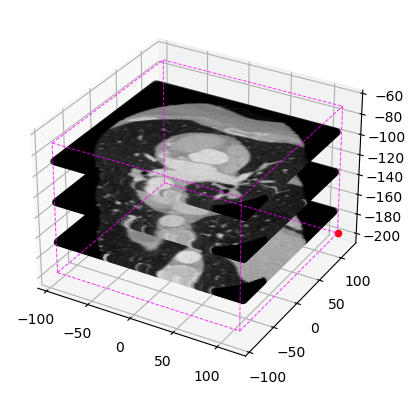

In [65]:
#view an image section in the 3d space with respect to the image bounding box
fig, ax = plt.subplots(1, 1, subplot_kw={"projection": "3d"})
xl, yl, zl = image.bounding_box.get_xlim(), image.bounding_box.get_ylim(), image.bounding_box.get_zlim()
ax.set_xlim([xl[0]-10, xl[1]+10])
ax.set_ylim([yl[0]-10, yl[1]+10])
ax.set_zlim([zl[0]-10, zl[1]+10])
ax.add_artist(image.bounding_box.get_artist())
ax.scatter(image.origin[0], image.origin[1], image.origin[2], c="r")
# get image samples # lower
for zs in [-180, -140, -100]:
  points_to_sample = []
  for xs in range(-110, 110, 2):
    for ys in range(-70, 130, 2):
      points_to_sample.append([xs, ys, zs])
  points_to_sample = numpy.array(points_to_sample) # N x 3
  samples = image.sample(points_to_sample.T, interpolation="nearest")
  # plot them
  ax.scatter(points_to_sample[:,0], points_to_sample[:,1], points_to_sample[:,2], c=samples, cmap="gray")
plt.show()

In [64]:
#generate volumes
# this function should work but we don't know what to give as input.. so we'll use his function. 
def generate_cubic_volume(voxel_coordinates, patch_size=32):
    """
    Genera un volume cubico a partire dalle coordinate del centro e dalla lunghezza del lato.

    Parameters:
    - voxel_coordinates (tuple or list): Coordinate del centro del cubo (x, y, z).
    - patch_size (float): Lunghezza del lato del cubo.

    Returns:
    - numpy.ndarray: Volume cubico.
    """
    # Assicurati che le coordinate siano in formato numpy.ndarray
    voxel_coordinates = np.array(voxel_coordinates)

    # Calcola gli estremi del cubo
    start_point = voxel_coordinates - patch_size / 2
    end_point = voxel_coordinates + patch_size / 2

    # Genera coordinate lungo ciascun asse
    x_coords = np.linspace(start_point[0], end_point[0], num=int(patch_size), endpoint=False)
    y_coords = np.linspace(start_point[1], end_point[1], num=int(patch_size), endpoint=False)
    z_coords = np.linspace(start_point[2], end_point[2], num=int(patch_size), endpoint=False)

    # Genera il cubo utilizzando meshgrid
    x, y, z = np.meshgrid(x_coords, y_coords, z_coords, indexing='ij')

    # Restituisci il volume cubico
    return np.stack((x, y, z), axis=-1)

# # Esempio di utilizzo
# center = (0, 0, 0)
# side_length = 5
# cubic_volume = generate_cubic_volume(center, side_length)
# print(cubic_volume.shape)  # Stampa le dimensioni del volume

In [72]:
# extract a cube from the original image
# we have to give as input the center of the cube and the side length
# we basically give the function the center of the ostia in RAS coordinates
# what it does is to convert the RAS coordinates into voxel coordinates
# and then it extracts the cube from the image. 
# the output is a numpy array of shape (32, 32, 32), which is the cube
# we can then plot the cube using matplotlib
# we can also plot the cube in 3d using the function plot_cube
# the function plot_cube is defined in the file plot_cube.py


CUBE_SIDE_MM = 12
CUBE_ISOTROPIC_SPACING_MM = 0.3
CUBE_SIDE_N_SAMPLES = int(CUBE_SIDE_MM * (1/CUBE_ISOTROPIC_SPACING_MM)) # you can define this as you prefer, no need to stick to this formula.

def get_cube_sample_points(center: np.ndarray, side_mm: float, n_samples_per_side: int):
    """Sample a cube centered in center with side side, n_samples points."""
    xs = np.linspace(center[0] - side_mm/2, center[0] + side_mm/2, n_samples_per_side)
    ys = np.linspace(center[1] - side_mm/2, center[1] + side_mm/2, n_samples_per_side)
    zs = np.linspace(center[2] - side_mm/2, center[2] + side_mm/2, n_samples_per_side)
    return np.array(np.meshgrid(xs, ys, zs)).reshape(3, -1).T



In [69]:
#these functions are taken from the 'code_example_PW3_sampling_cubes.py'
#we may need them in the future
def cube_samples_to_array(samples: np.ndarray, n_samples_per_side: int) -> numpy.ndarray:
    """Convert samples from a cube to a numpy array."""
    return samples.reshape(n_samples_per_side, n_samples_per_side, n_samples_per_side)

def cube_samples_to_tensor(samples: np.ndarray, n_samples_per_side: int) -> torch.Tensor:
    """Convert a sampled cube to a graph."""
    return torch.from_numpy(cube_samples_to_array(samples, n_samples_per_side)).float()

def get_input_data_from_vertex_ras_position(
        image: HearticDatasetManager.cat08.Cat08ImageCT|HearticDatasetManager.asoca.AsocaImageCT,
        position: numpy.ndarray,
        side_mm: float,
        n_samples_per_side: int,
        affine=numpy.eye(4)
    ) ->np.ndarray:

SyntaxError: incomplete input (4014614690.py, line 17)

In [73]:
#coordinate dell'ostium del grafo
x=g_asoca.nodes[ids[0]]['x']
y=g_asoca.nodes[ids[0]]['y']
z=g_asoca.nodes[ids[0]]['z']
print(x,y,z)

220.4165496826172 241.38864135742188 -93.45762634277344


In [74]:
locations= np.array([x,y,z])
x_image = image.sample(locations)
y_image = image.sample(locations)
z_image = image.sample(locations)


print(x_image, y_image, z_image)
print(locations)




-1024.0 -1024.0 -1024.0
[220.41654968 241.38864136 -93.45762634]


In [77]:
cube_samples_pos = get_cube_sample_points(locations, CUBE_SIDE_MM, CUBE_SIDE_N_SAMPLES)
print(f"cube samples position array shape: {cube_samples_pos.shape}")
print(cube_samples_pos)

cube samples position array shape: (64000, 3)
[[214.41654968 235.38864136 -99.45762634]
 [214.41654968 235.38864136 -99.14993404]
 [214.41654968 235.38864136 -98.84224173]
 ...
 [226.41654968 247.38864136 -88.07301096]
 [226.41654968 247.38864136 -87.76531865]
 [226.41654968 247.38864136 -87.45762634]]
